### Muon data analysis

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [12]:
data = pd.read_csv('muon.data', sep =' ' , header = None, names = ['life time', 'date'])
#print(data)

time = data[data['life time'] <=20000]
intervals = np.linspace(0,20,61)
time_m = data['life time']/1000.0
         

FileNotFoundError: [Errno 2] No such file or directory: 'muon.data'

In [3]:
# Histograma
heights, bins, _ = plt.hist(time_m, bins=intervals, edgecolor='black')
plt.xlabel('Tiempo de decaimiento (ns)',fontfamily='Times New Roman',fontsize=14)
plt.ylabel('Frecuencia (-)',fontfamily='Times New Roman',fontsize=14)
plt.title('Decaimiento de muones', loc='center', fontfamily='Times New Roman',fontsize=18)
plt.savefig('Histograma muones')
plt.grid()
plt.show()

NameError: name 'time_m' is not defined

In [49]:
# Ajuste de datos

# Definicion de la función
def muon(t, A, B, C):
    return A * np.exp(-t/B) + C

t = 0.5 * (bins[:-1] + bins[1:])

result, cov = curve_fit(muon, t, heights, maxfev=50000)
A, B, C = result

error_A = np.sqrt(cov[0, 0])
error_B = np.sqrt(cov[1, 1])
error_C = np.sqrt(cov[2, 2])

eq = f'y = {A:.2f}*exp(-t/{B:.2f}) \n+ {C:.2f}'

adjusted_curve = muon(t, A, B, C)
residuals = heights - adjusted_curve


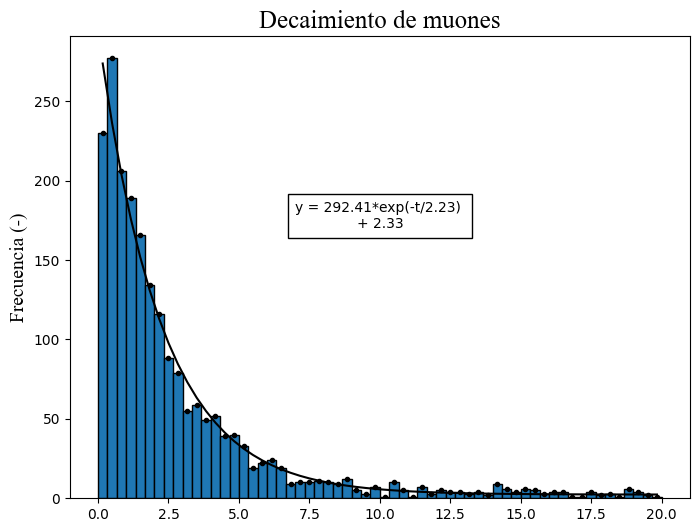

[ 0.16666667  0.5         0.83333333  1.16666667  1.5         1.83333333
  2.16666667  2.5         2.83333333  3.16666667  3.5         3.83333333
  4.16666667  4.5         4.83333333  5.16666667  5.5         5.83333333
  6.16666667  6.5         6.83333333  7.16666667  7.5         7.83333333
  8.16666667  8.5         8.83333333  9.16666667  9.5         9.83333333
 10.16666667 10.5        10.83333333 11.16666667 11.5        11.83333333
 12.16666667 12.5        12.83333333 13.16666667 13.5        13.83333333
 14.16666667 14.5        14.83333333 15.16666667 15.5        15.83333333
 16.16666667 16.5        16.83333333 17.16666667 17.5        17.83333333
 18.16666667 18.5        18.83333333 19.16666667 19.5        19.83333333]


In [50]:
# Gráfica
plt.figure(figsize=(8, 6))

plt.subplot2grid((4, 1), (0, 0), rowspan=1)
plt.scatter(t, residuals, color='black')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuos', loc='center', fontfamily='Times New Roman',fontsize=16)
plt.ylabel('Residuales (mT)',fontfamily='Times New Roman',fontsize=12)
plt.grid()

plt.subplot2grid((3, 1), (1, 0), rowspan=2)
plt.figure(figsize=(8,6))
plt.bar(t, heights, width=np.diff(bins), align='center', label='Histograma', edgecolor='black')
plt.scatter(t, heights, marker='.', color='black', label='Datos')
plt.plot(t, adjusted_curve, color='black')
plt.ylabel('Frecuencia (-)',fontfamily='Times New Roman',fontsize=14)
plt.title('Decaimiento de muones', loc='center', fontfamily='Times New Roman',fontsize=18)
plt.text(10, 170, eq, ha='center', fontsize=10, bbox=dict(boxstyle='square,pad=0.5', facecolor='white'))
plt.savefig('Ajuste muones')
plt.show()

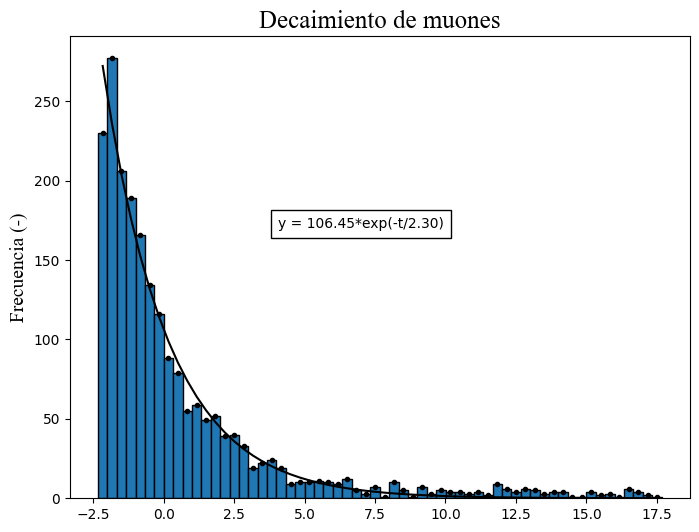

In [55]:
# Ajuste con la corrección

# limieza del ruido
tiempo = np.array([t[i] - C for i in range(len(t))])

def muon_2(t, A, B):
    return A * np.exp(-t/B) 

result, cov = curve_fit(muon_2, tiempo, heights, maxfev=50000)
A, B = result

error_A = np.sqrt(cov[0, 0])
error_B = np.sqrt(cov[1, 1])

eq = f'y = {A:.2f}*exp(-t/{B:.2f})'

adjusted_curve = muon_2(tiempo, A, B)
residuales = heights - adjusted_curve


#Ajuste
plt.figure(figsize=(8,6))
plt.bar(tiempo, heights, width=np.diff(bins), align='center', label='Histograma', edgecolor='black')
plt.scatter(tiempo, heights, marker='.', color='black', label='Datos')
plt.plot(tiempo, adjusted_curve, color='black')
plt.ylabel('Frecuencia (-)',fontfamily='Times New Roman',fontsize=14)
plt.title('Decaimiento de muones', loc='center', fontfamily='Times New Roman',fontsize=18)
plt.text(7, 170, eq, ha='center', fontsize=10, bbox=dict(boxstyle='square,pad=0.5', facecolor='white'))
plt.savefig('Ajuste corregido muones')
plt.show()